In [2]:
from helperTools import *
from latticeElements.utilities import ElementTooShortError
from latticeModels import make_Ring_And_Injector, RingGeometryError, InjectorGeometryError
from latticeModels_Parameters import optimizerBounds_V1_3,injectorParamsOptimalAny
from storageRingModeler import StorageRingModel
from phaseSpaceAnalyzer import SwarmSnapShot
from ParticleClass import Swarm


ringParams=(0.020750995745003702, 0.01                , 0.0338416724789386  ,0.0079375           , 0.4672288341272473  , 0.4101202965979298  )

includeBumper=False
systemParams=[ringParams,tuple(injectorParamsOptimalAny.values())]

PTL_Ring, PTL_Injector = make_Ring_And_Injector(systemParams,'3',options={'useSolenoidField': True,'includeBumper': includeBumper})

In [2]:
model=StorageRingModel(PTL_Ring,PTL_Injector,numParticlesSwarm=500)
h=7.5e-6
T=1.0
parallel=True
swarmInitial = model.trace_Through_Injector_And_Transform_To_Ring()
swarmTracedRing = model.swarmTracerRing.trace_Swarm_Through_Lattice(swarmInitial, h,T,
                                                               fastMode=False, accelerated=True, copySwarm=False,
                                                               parallel=parallel,stepsBetweenLogging=8)
print('done')

NameError: name 'StorageRingModel' is not defined

In [5]:
'a'

'a'

'a'

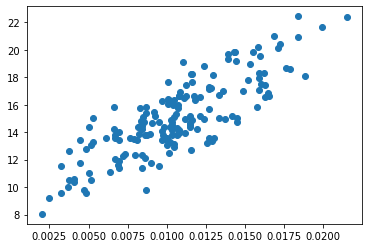

0.005958484864590608

In [8]:
particles=[particle for particle in swarmTracedRing.particles if particle.T>0.25]
y= np.array([particle.qi[1] for particle in  particles])
py=np.array([particle.pi[1] for particle in particles])
plt.scatter(y,py)
plt.show()

def emmitance(qi,pi):
    var_qi=np.mean(qi**2)-np.mean(qi)**2
    var_pi=np.mean(pi**2)-np.mean(pi)**2
    var_qipi=np.mean(pi*qi)-np.mean(pi)*np.mean(qi)
    return np.sqrt(var_qi*var_pi - var_qipi**2)
emmitance(y,py)

In [1]:
xMax=max([particle.qoArr[-1,0] for particle in swarmTracedRing])
revsMax=int(xMax/PTL_Ring.totalLength)-1
min_Survival_Time=0.0
x0=1.5
for revs in range(0,revsMax+1,revsMax//10):
    print('------------------revs--------')
    x=x0+revs*PTL_Ring.totalLength
    t=time.time()
    snap=SwarmSnapShot(swarmTracedRing.copy(),x,min_Survival_T=min_Survival_Time)
    print(time.time()-t)
    print(snap.num_Surviving())
    exit()
    phaseSpace=snap.get_Surviving_Particle_PhaseSpace_Coords()
    y,py=phaseSpace[:,1],phaseSpace[:,-2]
    z,pz=phaseSpace[:,2],phaseSpace[:,-1]
    # plt.hist(pz)
    # plt.xlim([-15,15])
    # plt.show()
    # plt.hist(py)
    # plt.xlim([-15,15])
    # plt.show()
    print('epsy',emmitance(y,py))
    plt.scatter(y,py)
    plt.xlim([-.005,.005])
    plt.ylim([-15,15])
    plt.show()
    print('epsz',emmitance(z,pz))
    plt.scatter(z,pz)
    plt.xlim([-.005,.005])
    plt.ylim([-15,15])
    plt.show()

NameError: name 'swarmTracedRing' is not defined